In [1]:
import numpy as np 
import cv2 


# Capturing video through webcam 
webcam = cv2.VideoCapture(0) 

# Start a while loop 
while(1): 
	
	# Reading the video from the 
	# webcam in image frames 
	_, imageFrame = webcam.read() 

	# Convert the imageFrame in 
	# BGR(RGB color space) to 
	# HSV(hue-saturation-value) 
	# color space 
	hsvFrame = cv2.cvtColor(imageFrame, cv2.COLOR_BGR2HSV) 

	# Set range for red color and 
	# define mask 
	red_lower = np.array([136, 87, 111], np.uint8) 
	red_upper = np.array([180, 255, 255], np.uint8) 
	red_mask = cv2.inRange(hsvFrame, red_lower, red_upper) 

	# Set range for green color and 
	# define mask 
	green_lower = np.array([25, 52, 72], np.uint8) 
	green_upper = np.array([102, 255, 255], np.uint8) 
	green_mask = cv2.inRange(hsvFrame, green_lower, green_upper) 

	# Set range for blue color and 
	# define mask 
	blue_lower = np.array([94, 80, 2], np.uint8) 
	blue_upper = np.array([120, 255, 255], np.uint8) 
	blue_mask = cv2.inRange(hsvFrame, blue_lower, blue_upper) 
	
	# Morphological Transform, Dilation 
	# for each color and bitwise_and operator 
	# between imageFrame and mask determines 
	# to detect only that particular color 
	kernel = np.ones((5, 5), "uint8") 
	
	# For red color 
	red_mask = cv2.dilate(red_mask, kernel) 
	res_red = cv2.bitwise_and(imageFrame, imageFrame, 
							mask = red_mask) 
	
	# For green color 
	green_mask = cv2.dilate(green_mask, kernel) 
	res_green = cv2.bitwise_and(imageFrame, imageFrame, 
								mask = green_mask) 
	
	# For blue color 
	blue_mask = cv2.dilate(blue_mask, kernel) 
	res_blue = cv2.bitwise_and(imageFrame, imageFrame, 
							mask = blue_mask) 

	# Creating contour to track red color 
	contours, hierarchy = cv2.findContours(red_mask, 
										cv2.RETR_TREE, 
										cv2.CHAIN_APPROX_SIMPLE) 
	
	for pic, contour in enumerate(contours): 
		area = cv2.contourArea(contour) 
		if(area > 300): 
			x, y, w, h = cv2.boundingRect(contour) 
			imageFrame = cv2.rectangle(imageFrame, (x, y), 
									(x + w, y + h), 
									(0, 0, 255), 2) 
			
			cv2.putText(imageFrame, "Red Colour", (x, y), 
						cv2.FONT_HERSHEY_SIMPLEX, 1.0, 
						(0, 0, 255))	 

	# Creating contour to track green color 
	contours, hierarchy = cv2.findContours(green_mask, 
										cv2.RETR_TREE, 
										cv2.CHAIN_APPROX_SIMPLE) 
	
	for pic, contour in enumerate(contours): 
		area = cv2.contourArea(contour) 
		if(area > 300): 
			x, y, w, h = cv2.boundingRect(contour) 
			imageFrame = cv2.rectangle(imageFrame, (x, y), 
									(x + w, y + h), 
									(0, 255, 0), 2) 
			
			cv2.putText(imageFrame, "Green Colour", (x, y), 
						cv2.FONT_HERSHEY_SIMPLEX, 
						1.0, (0, 255, 0)) 

	# Creating contour to track blue color 
	contours, hierarchy = cv2.findContours(blue_mask, 
										cv2.RETR_TREE, 
										cv2.CHAIN_APPROX_SIMPLE) 
	for pic, contour in enumerate(contours): 
		area = cv2.contourArea(contour) 
		if(area > 300): 
			x, y, w, h = cv2.boundingRect(contour) 
			imageFrame = cv2.rectangle(imageFrame, (x, y), 
									(x + w, y + h), 
									(255, 0, 0), 2) 
			
			cv2.putText(imageFrame, "Blue Colour", (x, y), 
						cv2.FONT_HERSHEY_SIMPLEX, 
						1.0, (255, 0, 0)) 
			
	# Program Termination 
	cv2.imshow("Multiple Color Detection in Real-TIme", imageFrame) 
	if cv2.waitKey(10) & 0xFF == ord('q'): 
		webcam.release() 
		cv2.destroyAllWindows() 
		break

KeyboardInterrupt: 

In [ ]:
from PIL import ImageGrab
import numpy as np
import cv2
while(True):
    img = ImageGrab.grab(bbox=(100,10,400,780)) #bbox specifies specific region (bbox= x,y,width,height)
    img_np = np.array(img)
    frame = cv2.cvtColor(img_np, cv2.COLOR_BGR2GRAY)
    cv2.imshow("test", frame)
    cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
import numpy as np
import cv2
from mss import mss
from PIL import Image

sct = mss()

while 1:
    w, h = 800, 640
    monitor = {'top': 0, 'left': 0, 'width': w, 'height': h}
    img = Image.frombytes('RGB', (w,h), sct.grab(monitor).rgb)
    cv2.imshow('test', cv2.cvtColor(np.array(img), cv2.COLOR_RGB2BGR))
    if cv2.waitKey(25) & 0xFF == ord('q'):
        cv2.destroyAllWindows()
        break

In [1]:
# pip install mss

In [ ]:
## import mss
import numpy

with mss.mss() as sct:
    monitor = {'top': 40, 'left': 0, 'width': 800, 'height': 640}
    img = numpy.array(sct.grab(monitor))
    print(img)

In [22]:
import cv2
from cv2 import VideoWriter
from cv2 import VideoWriter_fourcc
import pyautogui as pg
import numpy as np


# video = VideoWriter('desktop.mp4', VideoWriter_fourcc(*'MP42'), 7, (1366, 768))

while True:
    screenshot = cv2.cvtColor(np.array(pg.screenshot(region=(1272, 676, 1327-1272, 834-676))), cv2.COLOR_RGB2BGR)
    
#     video.write(screenshot) # write video frame
    
    cv2.imshow('Screenshot', screenshot) # display screenshot in a window
    
    if cv2.waitKey(1) & 0xFF == 27: break # escape condition
        

cv2.destroyAllWindows() # clean ups
    

KeyboardInterrupt: 

In [11]:
pg.position()

Point(x=1322, y=677)

In [12]:
pg.position()

Point(x=1377, y=678)

In [13]:
pg.position()

Point(x=1323, y=835)

In [14]:
pg.position()

Point(x=1380, y=833)

In [ ]:
1272, 

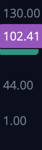

In [25]:
pg.screenshot(region=(1328, 677, 42, 150))

In [26]:
import pytesseract
import pyautogui as pg

pytesseract.image_to_string(pg.screenshot(region=(1328, 677, 42, 150)))

'130.00\n\n44.00\n\n1.00\n'

In [5]:
import numpy as np 
import cv2 

import pyautogui as pg


# Capturing video through webcam 
# webcam = cv2.VideoCapture(0) 

# Start a while loop 
while(1): 
	
	# Reading the video from the 
	# webcam in image frames 
	# _, imageFrame = webcam.read() 

	# Convert the imageFrame in 
	# BGR(RGB color space) to 
	# HSV(hue-saturation-value) 
	# color space 
	# hsvFrame = cv2.cvtColor(imageFrame, cv2.COLOR_BGR2HSV) 
	imageFrame = np.array(pg.screenshot(region=(1272, 676, 1327-1272, 834-676)))
	hsvFrame = cv2.cvtColor(imageFrame, cv2.COLOR_BGR2HSV)

	# Set range for red color and 
	# define mask 
	red_lower = np.array([136, 87, 111], np.uint8) 
	red_upper = np.array([180, 255, 255], np.uint8) 
	red_mask = cv2.inRange(hsvFrame, red_lower, red_upper) 

	# Set range for green color and 
	# define mask 
	green_lower = np.array([25, 52, 72], np.uint8) 
	green_upper = np.array([102, 255, 255], np.uint8) 
	green_mask = cv2.inRange(hsvFrame, green_lower, green_upper) 

	# Set range for blue color and 
	# define mask 
	blue_lower = np.array([94, 80, 2], np.uint8) 
	blue_upper = np.array([120, 255, 255], np.uint8) 
	blue_mask = cv2.inRange(hsvFrame, blue_lower, blue_upper) 
	
	# Morphological Transform, Dilation 
	# for each color and bitwise_and operator 
	# between imageFrame and mask determines 
	# to detect only that particular color 
	kernel = np.ones((5, 5), "uint8") 
	
	# For red color 
	red_mask = cv2.dilate(red_mask, kernel) 
	res_red = cv2.bitwise_and(imageFrame, imageFrame, 
							mask = red_mask) 
	
	# For green color 
	green_mask = cv2.dilate(green_mask, kernel) 
	res_green = cv2.bitwise_and(imageFrame, imageFrame, 
								mask = green_mask) 
	
	# For blue color 
	blue_mask = cv2.dilate(blue_mask, kernel) 
	res_blue = cv2.bitwise_and(imageFrame, imageFrame, 
							mask = blue_mask) 

	# Creating contour to track red color 
	contours, hierarchy = cv2.findContours(red_mask, 
										cv2.RETR_TREE, 
										cv2.CHAIN_APPROX_SIMPLE) 
	
	for pic, contour in enumerate(contours): 
		area = cv2.contourArea(contour) 
		if(area > 300): 
			x, y, w, h = cv2.boundingRect(contour) 
			imageFrame = cv2.rectangle(imageFrame, (x, y), 
									(x + w, y + h), 
									(0, 0, 255), 2) 
			
			cv2.putText(imageFrame, "Red Colour", (x, y), 
						cv2.FONT_HERSHEY_SIMPLEX, 1.0, 
						(0, 0, 255))	 

	# Creating contour to track green color 
	contours, hierarchy = cv2.findContours(green_mask, 
										cv2.RETR_TREE, 
										cv2.CHAIN_APPROX_SIMPLE) 
	
	for pic, contour in enumerate(contours): 
		area = cv2.contourArea(contour) 
		if(area > 300): 
			x, y, w, h = cv2.boundingRect(contour) 
			imageFrame = cv2.rectangle(imageFrame, (x, y), 
									(x + w, y + h), 
									(0, 255, 0), 2) 
			
			cv2.putText(imageFrame, "Green Colour", (x, y), 
						cv2.FONT_HERSHEY_SIMPLEX, 
						1.0, (0, 255, 0)) 

	# Creating contour to track blue color 
	contours, hierarchy = cv2.findContours(blue_mask, 
										cv2.RETR_TREE, 
										cv2.CHAIN_APPROX_SIMPLE) 
	for pic, contour in enumerate(contours): 
		area = cv2.contourArea(contour) 
		if(area > 300): 
			x, y, w, h = cv2.boundingRect(contour) 
			imageFrame = cv2.rectangle(imageFrame, (x, y), 
									(x + w, y + h), 
									(255, 0, 0), 2) 
			
			cv2.putText(imageFrame, "Blue Colour", (x, y), 
						cv2.FONT_HERSHEY_SIMPLEX, 
						1.0, (255, 0, 0)) 
			
	# Program Termination 
	cv2.imshow("Multiple Color Detection in Real-TIme", imageFrame) 
	if cv2.waitKey(10) & 0xFF == ord('q'): 
		webcam.release() 
		cv2.destroyAllWindows() 
		break


KeyboardInterrupt



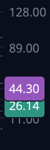

In [47]:
import pyautogui as pg

tgtregion = (1322, 679, 50, 150)
pg.screenshot(region=tgtregion)

In [48]:
img = np.array(pg.screenshot(region=tgtregion))
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

red_lower = np.array([136, 87, 111], np.uint8) 
red_upper = np.array([180, 255, 255], np.uint8) 
red_mask = cv2.inRange(hsv, red_lower, red_upper)

In [49]:
# plt.imshow(red_mask, cmap='gray')

In [50]:
contours, _ = cv2.findContours(red_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Optional: sort contours by area if needed
contours = sorted(contours, key=cv2.contourArea, reverse=True)

rois = []
for cnt in contours:
    x, y, w, h = cv2.boundingRect(cnt)
    roi = img[y:y+h, x:x+w]
    rois.append(roi)
    
import pytesseract

# Optional: preprocess ROI (convert to grayscale, threshold)
def preprocess(roi):
    gray = cv2.cvtColor(roi, cv2.COLOR_BGR2GRAY)
    _, thresh = cv2.threshold(gray, 100, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    return thresh

for i, roi in enumerate(rois):
    processed = preprocess(roi)
    text = pytesseract.image_to_string(processed, config='--psm 7 digits')
    print(f"Box {i+1}: {text.strip()}")

Box 1: 44.30


In [19]:
import pytesseract
pytesseract.image_to_string(pg.screenshot(region=tgtregion))

'128.00\n\n89.00\n\n11.00\n'

In [20]:
import matplotlib.pyplot as plt

In [21]:
import cv2
import numpy as np

# img = cv2.imread('your_image.png')
imageFrame = np.array(pg.screenshot(region=tgtregion))
img = np.array(pg.screenshot(region=tgtregion))
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

In [ ]:
# load image
# img = cv2.imread("city.png")
# add blur because of pixel artefacts 
img = cv2.GaussianBlur(img, (5, 5),5)
# convert to HSV
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV) 
# set lower and upper color limits
lower_val = (40, 100, 100)
upper_val = (60,255,200)
# Threshold the HSV image to get only green colors
mask = cv2.inRange(hsv, lower_val, upper_val)
# apply mask to original image
res = cv2.bitwise_and(img,img, mask= mask)
#show imag
cv2.imshow("Result", res)
# detect contours in image
contours, hierarchy = cv2.findContours(mask, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
# draw filled contour on result
for cnt in contours:
    cv2.drawContours(res, [cnt], 0, (0,0,255), 2)
# detect edges in mask
edges = cv2.Canny(mask,100,100)
# to save an image use cv2.imwrite('filename.png',img)
#show images
cv2.imshow("Result_with_contours", res)
cv2.imshow("Mask", mask)
cv2.imshow("Edges", edges)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [22]:
red_lower = np.array([136, 87, 111], np.uint8) 
red_upper = np.array([180, 255, 255], np.uint8) 
red_mask = cv2.inRange(hsv, red_lower, red_upper)

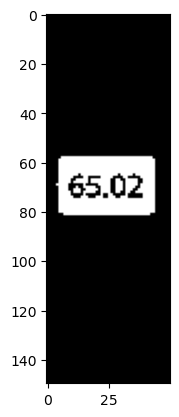

In [25]:
plt.imshow(red_mask, cmap='gray')

In [27]:
plt.imsave('red_mask.png', red_mask, cmap='gray')

In [28]:
pytesseract.image_to_string('red_mask.png')

''

In [ ]:
# Creating contour to track red color 
contours, hierarchy = cv2.findContours(purple_mask, 
                                    cv2.RETR_TREE, 
                                    cv2.CHAIN_APPROX_SIMPLE) 
while(1):
    for pic, contour in enumerate(contours): 
        area = cv2.contourArea(contour) 
        if(area > 300): 
            x, y, w, h = cv2.boundingRect(contour) 
            imageFrame = cv2.rectangle(imageFrame, (x, y), 
                                    (x + w, y + h), 
                                    (0, 0, 255), 2) 

            cv2.putText(imageFrame, "Purple Colour", (x, y), 
                        cv2.FONT_HERSHEY_SIMPLEX, 1.0, 
                        (0, 0, 255))
    # Program Termination 
    cv2.imshow("Multiple Color Detection in Real-TIme", imageFrame) 
    if cv2.waitKey(10) & 0xFF == ord('q'): 
        cv2.destroyAllWindows() 
        break

In [20]:
krn = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 3))
dlt = cv2.dilate(purple_mask, krn, iterations=1)
thr = 255 - cv2.bitwise_and(dlt, purple_mask)

In [23]:
cv2.imshow("Multiple Color Detection in Real-TIme", thr) 

In [25]:
pytesseract.image_to_string(thr, config="--psm 10")

':\n'

In [34]:
red_lower = np.array([136, 87, 111], np.uint8) 
red_upper = np.array([180, 255, 255], np.uint8) 
red_mask = cv2.inRange(hsv, red_lower, red_upper)

contours, _ = cv2.findContours(red_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Optional: sort contours by area if needed
contours = sorted(contours, key=cv2.contourArea, reverse=True)

rois = []
for cnt in contours:
    x, y, w, h = cv2.boundingRect(cnt)
    roi = img[y:y+h, x:x+w]
    rois.append(roi)
    
import pytesseract

# Optional: preprocess ROI (convert to grayscale, threshold)
def preprocess(roi):
    gray = cv2.cvtColor(roi, cv2.COLOR_BGR2GRAY)
    _, thresh = cv2.threshold(gray, 100, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    return thresh

for i, roi in enumerate(rois):
    processed = preprocess(roi)
    text = pytesseract.image_to_string(processed, config='--psm 7 digits')
    print(f"Box {i+1}: {text.strip()}")

Box 1: 65.02


In [6]:
text

''

In [33]:
red_lower = np.array([136, 87, 111], np.uint8) 
red_upper = np.array([180, 255, 255], np.uint8) 
red_mask = cv2.inRange(hsv, red_lower, red_upper)

# contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# kernel = np.ones((5, 5), "uint8")
# mask = cv2.dilate(mask, kernel) 
contours, hierarchy = cv2.findContours(red_mask, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE) 

import pytesseract

for cnt in contours:
    x, y, w, h = cv2.boundingRect(cnt)
    roi = img[y:y+h, x:x+w]

    # Convert to grayscale
    gray = cv2.cvtColor(roi, cv2.COLOR_BGR2GRAY)

    # Invert grayscale image (white digits become dark on light background)
    inverted = cv2.bitwise_not(gray)

    # Apply thresholding to isolate the digits
    _, binary = cv2.threshold(inverted, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    # OCR: focus on digits only
    text = pytesseract.image_to_string(binary, config='--psm 7 -c tessedit_char_whitelist=0123456789')
    print(f"Detected number: {text.strip()}")

Detected number: 6502
Detected number: 
Detected number: 
Detected number: 2
Detected number: 0
Detected number: 
Detected number: 6
Detected number: 


In [4]:
contours

(array([[[103, 110]]], dtype=int32),
 array([[[105, 106]],
 
        [[105, 107]]], dtype=int32),
 array([[[ 82, 104]]], dtype=int32),
 array([[[ 81, 101]],
 
        [[ 81, 102]]], dtype=int32),
 array([[[ 72, 100]]], dtype=int32),
 array([[[80, 97]],
 
        [[80, 98]]], dtype=int32),
 array([[[74, 97]]], dtype=int32),
 array([[[79, 95]]], dtype=int32),
 array([[[149,  64]]], dtype=int32))

In [ ]:
for cnt in contours:
    x, y, w, h = cv2.boundingRect(cnt)
    cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 2)
    # Optionally, display detected text at the top of each box
    cv2.putText(img, text.strip(), (x, y - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255, 255, 255), 2)

cv2.imshow("Detected", img)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [53]:
reslist = [1,2,3,4,5,6,7,8,1,2,4,8,3,2,5,6,7,]
np.max(reslist[-60//5:])

8

In [54]:
np.argmax(reslist[-60//5:])

2

In [55]:
lookbackw = 60//5
np.min(reslist[-(lookbackw + np.argmax(reslist[-lookbackw:])):])

1

In [11]:
pip install pyimagesearch

DEPRECATION: Loading egg at /Users/my/Documents/anaconda/anaconda3/lib/python3.11/site-packages/ibapi-10.30.1-py3.11.egg is deprecated. pip 23.3 will enforce this behaviour change. A possible replacement is to use pip for package installation..
ERROR: Could not find a version that satisfies the requirement pyimagesearch (from versions: none)
ERROR: No matching distribution found for pyimagesearch
Note: you may need to restart the kernel to use updated packages.
